In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 

data=pd.read_csv('data.csv')

data.head()

,ID,面积,周长,暴雨,比降,断层,岩性,最大高程,最小高程,相对高差,主沟长度
0,T001,65924920,37022,58,0.79,1,4380,1557,2823,12031,235
1,T002,30245122,26890,57,0.79,1,4520,1557,2963,10973,270
2,T003,45788150,31986,57,0.85,2,4640,1549,3091,11612,266
3,T004,105370617,50908,72,0.78,3,5120,1620,3500,17338,202
4,T005,10352295,14824,62,0.85,1,4220,1561,2659,5731,464


In [3]:
data.describe()
scaler=StandardScaler()
# data['面积_T','周长_T','暴雨_T','比降_T',
#      '断层_T','岩性_T','最大高程_T','最小高程_T',
#      '相对高差_T','主沟长度_T']=scaler.fit_transform(data[['面积','周长','暴雨','比降','断层','岩性','最大高程','最小高程','相对高差','主沟长度']])

# 对数据进行标准化
data_scaled = scaler.fit_transform(data[['面积','周长','暴雨','比降','断层','岩性','最大高程','最小高程','相对高差','主沟长度']])
# 将标准化后的数据赋值给新的列
data[['面积_T','周长_T','暴雨_T','比降_T','断层_T','岩性_T','最大高程_T','最小高程_T','相对高差_T','主沟长度_T']] = data_scaled

In [4]:
def optimise_km(data,max_k):
    means=[]
    inertias=[]
    for k in range(1,max_k):
        kmeans=KMeans(n_clusters=k,random_state=1)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
    
    plt.figure(figsize=(5,5)) 
    plt.plot(means,inertias,'o-')
    plt.xlabel('cluster number')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

/Users/bre/miniconda3/envs/data/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/bre/miniconda3/envs/data/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/bre/miniconda3/envs/data/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/bre/miniconda3/envs/data/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

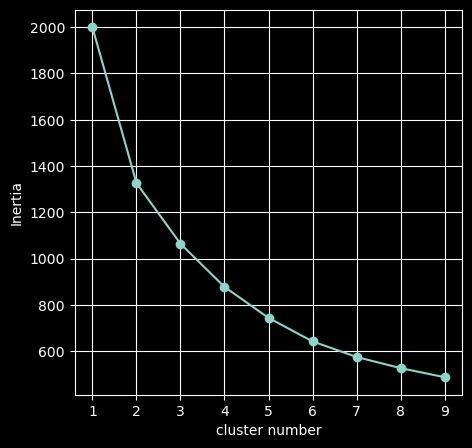

In [5]:
optimise_km(data[['面积_T','周长_T','暴雨_T','比降_T','断层_T','岩性_T','最大高程_T','最小高程_T','相对高差_T','主沟长度_T']],10)

In [6]:
kmeans=KMeans(n_clusters=5,random_state=1)

kmeans.fit(data[['面积_T','周长_T','暴雨_T','比降_T','断层_T','岩性_T','最大高程_T','最小高程_T','相对高差_T','主沟长度_T']])
data['category']=kmeans.labels_
data

/Users/bre/miniconda3/envs/data/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,ID,面积,周长,暴雨,比降,断层,岩性,最大高程,最小高程,相对高差,...,周长_T,暴雨_T,比降_T,断层_T,岩性_T,最大高程_T,最小高程_T,相对高差_T,主沟长度_T,category
0,T001,65924920,37022,58,0.79,1,4380,1557,2823,12031,...,0.797967,-3.137118,-0.301659,-0.302372,1.317287,1.679793,0.851085,0.478421,-0.744112,2
1,T002,30245122,26890,57,0.79,1,4520,1557,2963,10973,...,0.245860,-3.368811,-0.301659,-0.302372,1.494802,1.679793,1.053814,0.327729,-0.560115,2
2,T003,45788150,31986,57,0.85,2,4640,1549,3091,11612,...,0.523548,-3.368811,0.836677,0.453557,1.646958,1.650007,1.239166,0.418743,-0.581143,2
3,T004,105370617,50908,72,0.78,3,5120,1620,3500,17338,...,1.554635,0.106579,-0.491381,1.209486,2.255580,1.914359,1.831424,1.234303,-0.917596,1
4,T005,10352295,14824,62,0.85,1,4220,1561,2659,5731,...,-0.411633,-2.210348,0.836677,-0.302372,1.114413,1.694686,0.613603,-0.418894,0.459757,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,T196,29774013,28883,88,0.82,0,2260,658,1602,10619,...,0.354461,3.813661,0.267509,-1.058301,-1.370795,-1.667432,-0.917001,0.277309,-1.185706,3
196,T197,35432134,27258,68,0.79,1,2293,658,1635,9994,...,0.265913,-0.820192,-0.301659,-0.302372,-1.328952,-1.667432,-0.869215,0.188289,-1.117364,3
197,T198,16602244,27193,68,0.80,0,2180,658,1522,10555,...,0.262371,-0.820192,-0.111936,-1.058301,-1.472232,-1.667432,-1.032846,0.268193,-1.222506,3
198,T199,13953579,19401,72,0.78,3,2368,659,1709,6507,...,-0.162226,0.106579,-0.491381,1.209486,-1.233855,-1.663708,-0.762058,-0.308367,-0.596914,3


In [ ]:
# 将数据保存到新的csv文件中
data.to_csv('result_new.csv', index=False)